# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("There are", df.shape[0], 'rows and' , df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:

The dataset has 1898 number of rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [15]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


#### Observations:
There are 4 numerical types, 4 object types, and 1 floater type columns in the data.


 All columns have 1898 observations, which can be inferred that there are no null values present in the dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

There are no missing values in any variable.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

The minimum time for food prepartion is 20 minutes, and the maximum time for food preparation is 35 minutes.

The average time for food preparation is 37 minutes.

The average cost of orders is about $16.50.

Customers order the most during the weekend.

There are about 14 different cuisine categories and American is the most purchased.

There are 178 different restaurant catergories and Shake Shake recevies the most orders.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df[df['rating'] == 'Not given'].count()


,0
order_id,736
customer_id,736
restaurant_name,736
cuisine_type,736
cost_of_the_order,736
day_of_the_week,736
rating,736
food_preparation_time,736
delivery_time,736


#### Observations:

There are 736 "Not given" ratings in the dataset.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# **Observations on Rating**

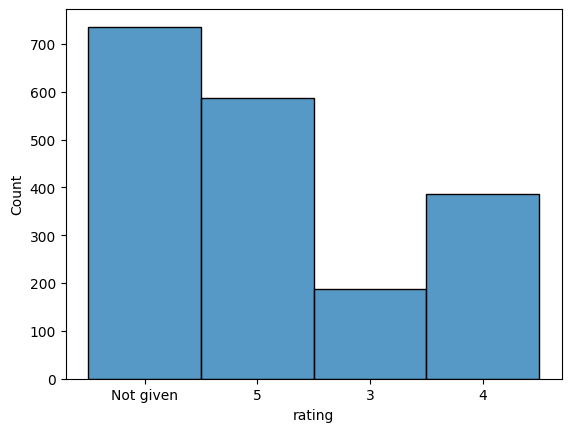

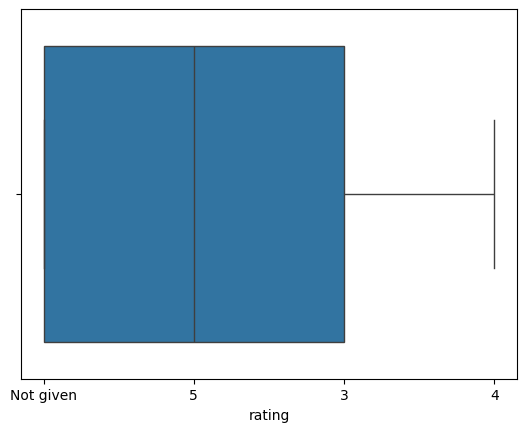

In [15]:
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

Observations

The distribution of rating is right skewed.

There are no outliers in this variable.

About 730 people chose not to give a review.



# **Observations on Cuisine Type**

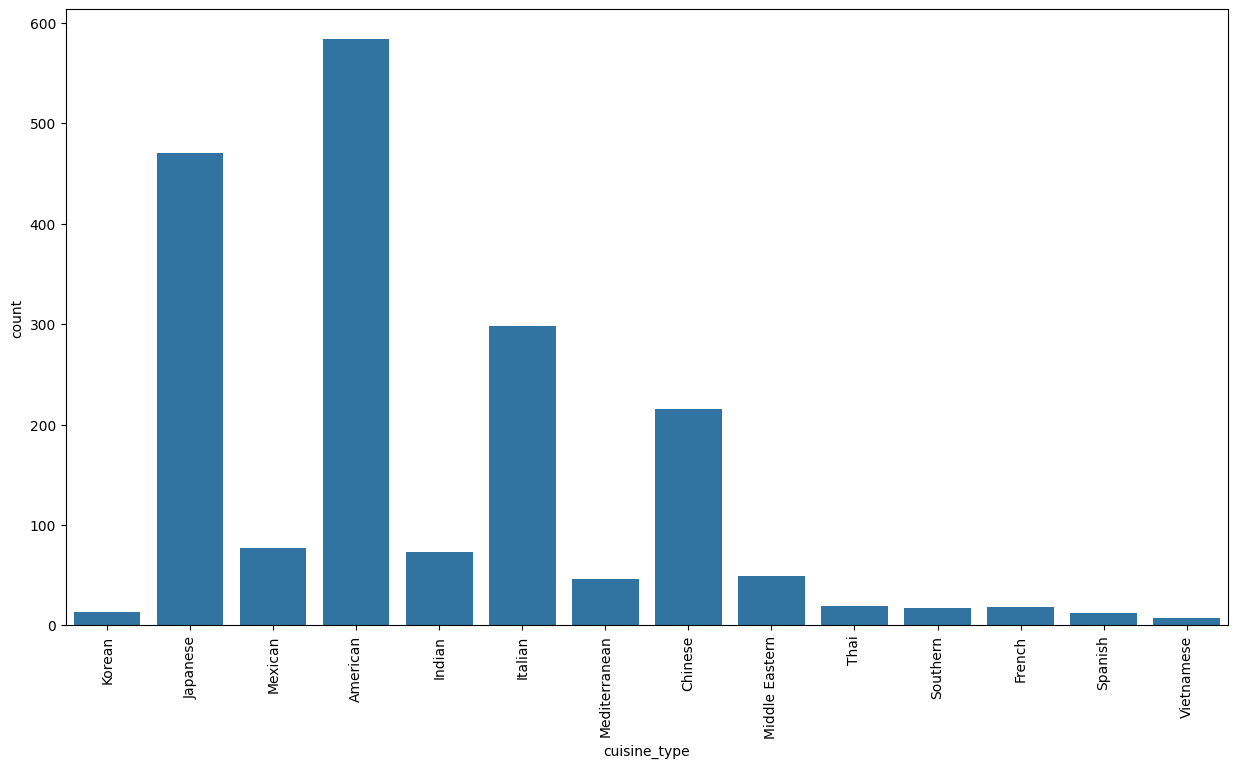

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

Observations

American cuisine is the most popluar cuisine type with close to 600 orders with Japanese as the second popluar with just under 500 orders.

The distribution for this variable is right skewed.

About 71% of cuisine types have less than 100 orders.



# **Observations on Day of the Week**




<Axes: xlabel='day_of_the_week', ylabel='count'>

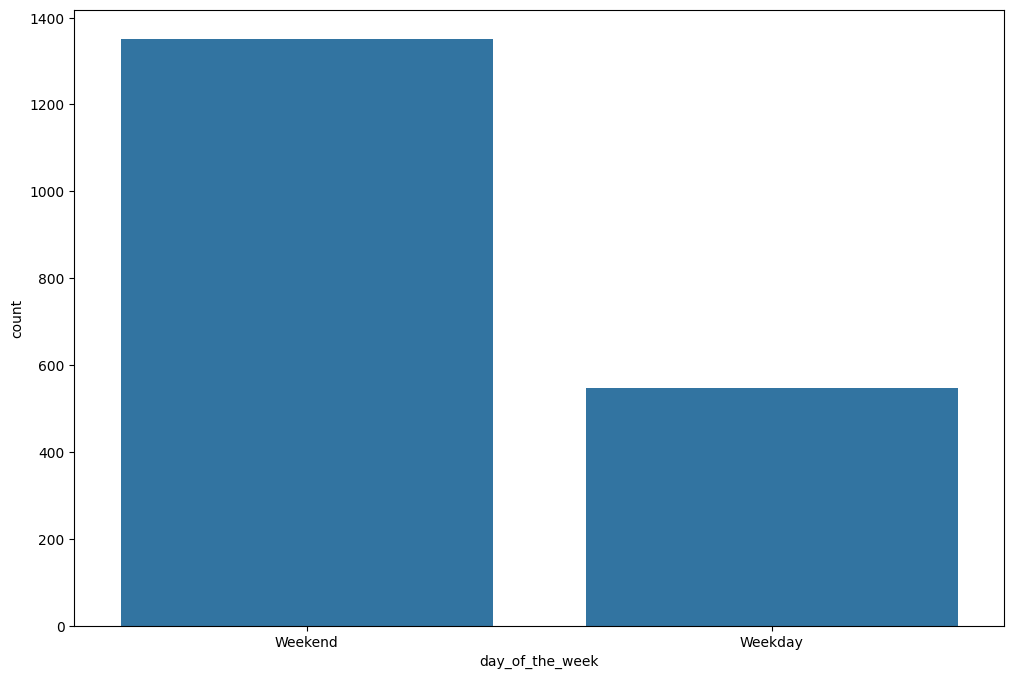

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='day_of_the_week')


Observations

More orders are placed on the Weekends.

The Weekday brings in less than 50% of orders compared to the Weekend.

# **Observations on Cost of the Order**

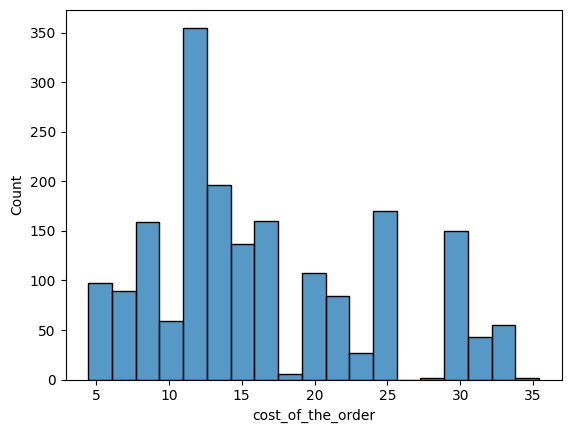

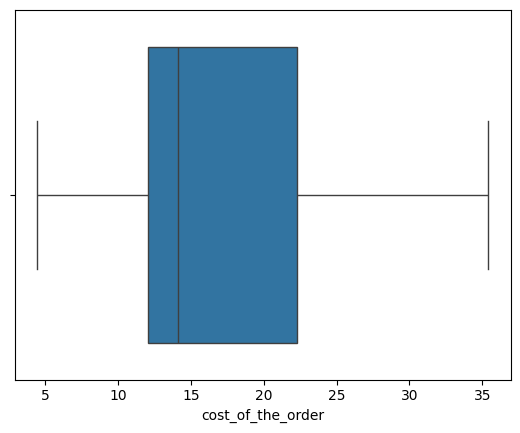

In [33]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Observations

There are no outliers in this variable.

25% of the orders cost around $12.

75% of the orders cost around $22.

The distribution is right skewed.

# **Obserbations on Food Preparation Time**

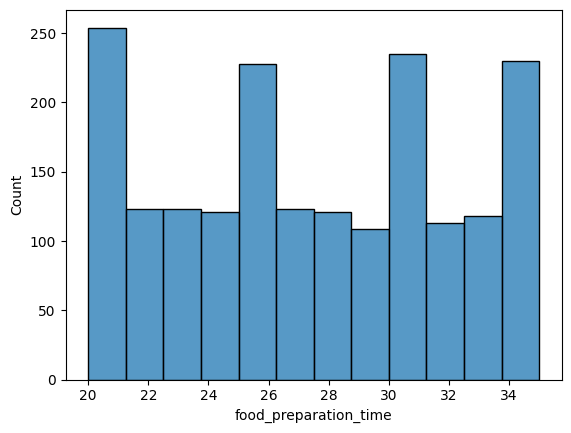

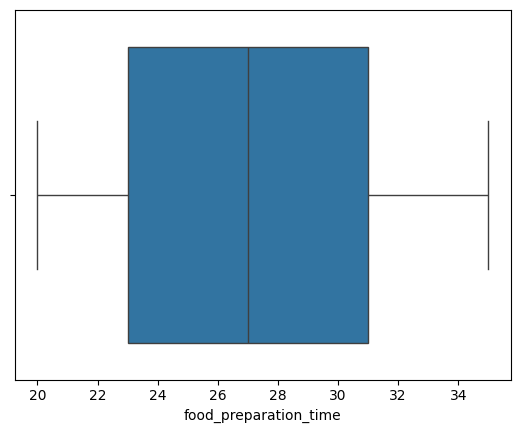

In [34]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

**Observation**

This distribution is symmetrical.

The median time for food preparation is 27 minutes.



# **Observations on Delivery Time**

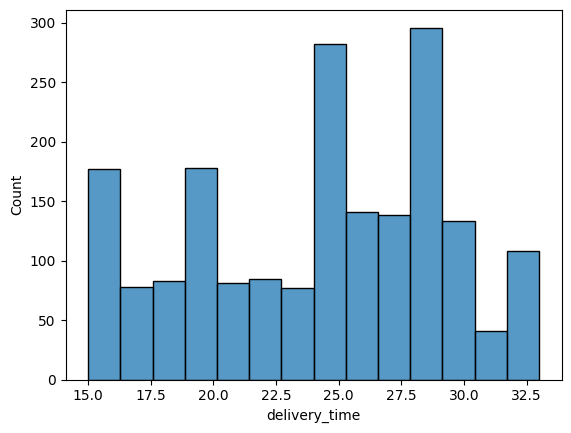

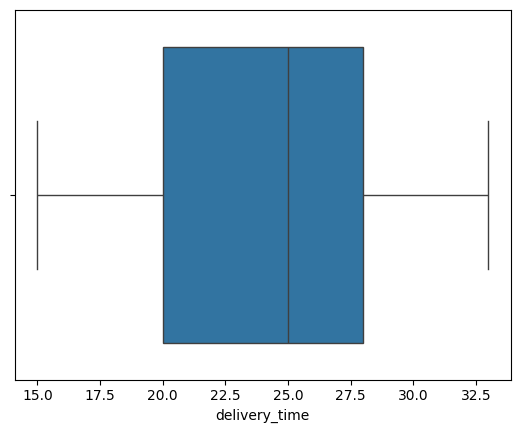

In [44]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

**Observations**

This distribution is left skewed.

The median delivery time is around 25 minutes.

25% of the deliveries take around 20 minutes.





# **Observations on Customer ID**

In [59]:
 customer = df['customer_id'].unique()
 len(customer)

1200

**Observations:**

Ther are 1200 unique customer ids.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
orders = df.groupby('restaurant_name')['order_id'].count()
orders.sort_values(ascending=False).head()

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

Shake Shack has the most orders received at 219.

The top five restaurants are a mix of American, Italian, and Japanese cusisine.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
pop_cuisine = df.groupby('day_of_the_week')['cuisine_type'].value_counts()
pop_cuisine.sort_values(ascending=False).head()

day_of_the_week  cuisine_type
Weekend          American        415
                 Japanese        335
                 Italian         207
Weekday          American        169
Weekend          Chinese         163
Name: count, dtype: int64

#### Observations:

The most popular cuisine on weekends is American.

Japanese comes in second for being popular on the weekends.

American cuisine is the most popular for weekdays as well.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [5]:
# Write the code here
df_cost = df['cost_of_the_order'].value_counts()
df_cost

,count
cost_of_the_order,
12.18,86
12.13,82
12.23,47
24.20,42
29.10,37
...,...
5.48,1
17.07,1
6.26,1


In [6]:
order_cost = df['cost_of_the_order'] > 20

In [7]:
count = order_cost.value_counts()
count

,count
cost_of_the_order,
False,1343
True,555


In [9]:
df_percent = round((count/ df['cost_of_the_order'].count()) * 100)
df_percent


,count
cost_of_the_order,
False,71.0
True,29.0


#### Observations:

About 29% of orders cost more than $20.

About 71% of orders are below $20.


9

### **Question 10**: What is the mean order delivery time? [1 mark]

In [86]:
round(df['delivery_time'].mean())

24

#### Observations:

The average delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [11]:
# Write the code here
customers = df.groupby('customer_id')['order_id'].count()
customers.sort_values(ascending=False).head()

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations:

The customer_id who has had the moost orders is 52832.

The majority of customers order less than 13.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [63]:
# Write the code here
df.groupby('day_of_the_week')['order_id'].count()

,order_id
day_of_the_week,
Weekday,547
Weekend,1351


Observations:

There are several more orders being placed on the weekends compare to the weekday,

# **Observation Between Rating and Restaurant Name**

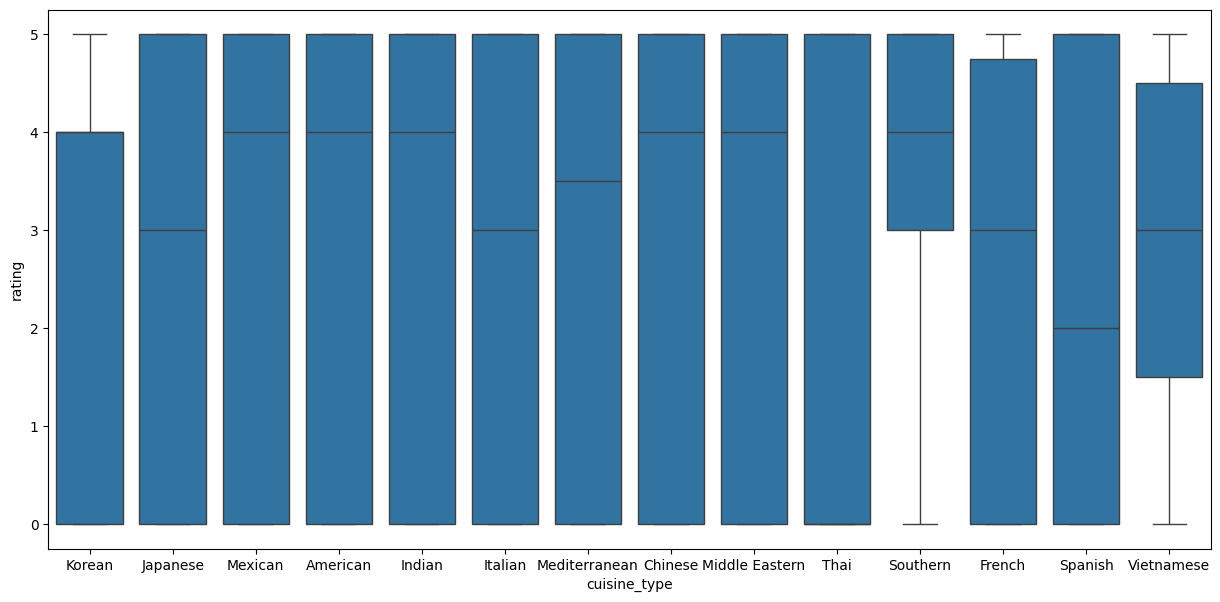

In [93]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['rating'])
plt.show()

In [101]:
df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

,rating
cuisine_type,
Southern,3.294118
Indian,3.109589
Middle Eastern,2.938776
Mediterranean,2.934783
Vietnamese,2.857143
Korean,2.846154
Mexican,2.753247
American,2.708904
Chinese,2.683721


Observations:

Southern cuisine is rated the most high, however it does not correlate bewteen # of orders for southern cuisine restaurants.


The top five most popluar cuisine for weekend orders are rated lower than the other cuisines.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [67]:
# Write the code here

rating_count = df.groupby('restaurant_name')['rating'].count()

rating_count.sort_values(ascending=False).head(7)

,rating
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55


In [82]:
df['rating'] = df['rating'].replace('Not given', '0')

In [83]:
df['rating'] = df ['rating'].astype(int)



In [84]:
avg_rating = df.groupby('restaurant_name')['rating'].mean()
avg_rating.sort_values(ascending=False).head(27)

,rating
restaurant_name,
'wichcraft,5.000000
Philippe Chow,5.000000
Bukhara Grill,5.000000
Kambi Ramen House,5.000000
Hunan Manor,5.000000
Chola Eclectic Indian Cuisine,5.000000
Chote Nawab,5.000000
Cipriani Le Specialita,5.000000
Hot Kitchen,5.000000


In [53]:
p_offer = (rating_count > 50) & (avg_rating > 4)
p_offer.sort_values(ascending=False).tail()

,rating
restaurant_name,
Galli Restaurant,False
Go! Go! Curry!,False
Grand Sichuan International,False
Haandi,False
indikitch,False


#### Observations:

None of the restaurants meets both of the criteria.

The restaurants with the most ratings have an average rating no greater than 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [140]:

  total_revenue = 0
  for i in df['cost_of_the_order']:
    if (i >20):
      total_revenue = total_revenue + (i * 0.25)
    elif (5 < i < 20):
        total_revenue = total_revenue + (i * 0.15)
    else:
          total_revenue = total_revenue + (i +0)
  print(total_revenue)

6209.042999999994


#### Observations:

* The net revenue is 6209.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
order_t = df['delivery_time'] + df['food_preparation_time']
order_t2 = order_t > 60
order_t2.value_counts()





,count
False,1698
True,200


In [ ]:
df_percent = round((order_t2.value_counts()/ df['cost'].count()) * 100 )
df_percent

,count
False,89.0
True,11.0




#### Observations:

* Deliveries that take longer than 60 minutes occur 11% of the time, while 89% of the time, customers receive their orders in under 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

mean_dt = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_dt

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

* Longer delivery times during the week may contribute to the lower number of orders.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Weekends see the highest number of orders, suggesting that customers enjoy ordering food during this time.

* American cuisine is the most popular catergory in cuisine_type.

* The average cost of the top 5 popular cuisines is about $16.

* The average cost of all cuisine types are close in range, so it can be inferred it does not effect the popularity.

* The delivery time is shorter on weekends compared to weekdays, suggesting that the number of deliveries affects delivery time, or vice versa.

### Recommendations:

*  Analyze peak order times and allocate more resources during weekends to ensure timely deliveries.

* Include more American and Japanese cuisine options, as they are among the most popular choices.

* Use targeted marketing campaigns on social media to promote weekday specials, attracting more customers to increase weekday sales.

*  Introduce a loyalty program that rewards frequent customers with discounts or exclusive offers, encouraging repeat business.

---